<a href="https://colab.research.google.com/github/jnramirezg/medio_continuo/blob/main/codigo/28-analisis_viga_simplemente_apoyada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 28. Análisis viga simplemente apoyada

|Quién | Fecha | Qué hizo |
| ---  | ---   | ---      |
|Juan Nicolás Ramírez, <jnramirezg@unal.edu.co> | 2023-02-15 | Creando código|

En este programa analizamos con variables simbólicas la siguiente viga simplemente apoyada, después reemplazamos con los valores numéricos usado en el programa: [27- Diseño esquemático de concreto](https://github.com/jnramirezg/medio_continuo/blob/main/codigo/27-diseno_concreto_reforzado.ipynb). Calculamos mediante la teoría de Euler-Bernoulli las funciones de fuerza cortantes, momento flector, ángulo de giro y deflexión (desplazamiento vertical).

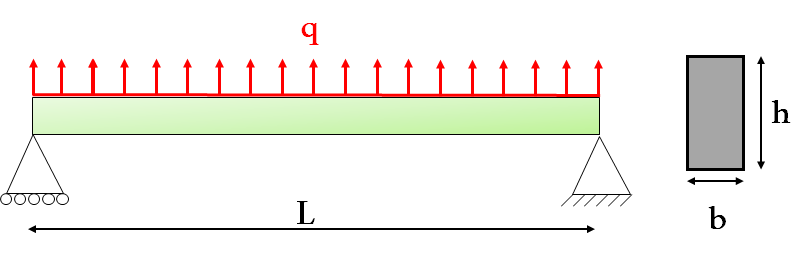

Importamos las librerías necesarias:

In [1]:
from sympy import *
from numpy import *
from matplotlib.pyplot import *

Definimos las variables simbólicas:

In [2]:
L, q, EI = symbols("L, q, EI")          # Propiedades de la viga.
x = symbols("x")                            # Variable de posición.
c1, c2, c3, c4 = symbols("c1, c2, c3, c4")  # Constantes de integración.

Usamos las siguientes ecuaciones de la viga de Euler-Bernoulli de la sección 9.9 del ````main.pdf````:

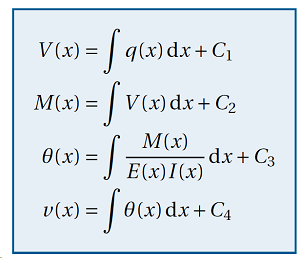

In [3]:
V =  integrate(q, x) + c1         # Fuerza cortante.
M =  integrate(V, x) + c2         # Momento flector.
t = (integrate(M, x) + c3)/(EI)  # Ángulo de giro.
v =  integrate(t, x) + c4         # Deflexión (desplazamiento vertical).

Consideramos las siguientes condiciones de frontera de la sección 9.7 del ````main.pdf````:

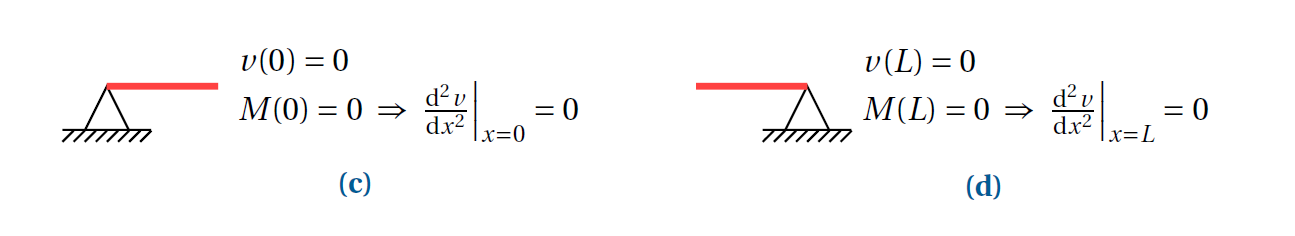

In [4]:
e1 = M.subs(x, 0) - 0  # M(0)=0
e2 = M.subs(x, L) - 0  # M(L)=0
e3 = v.subs(x, 0) - 0  # v(0)=0
e4 = v.subs(x, L) - 0  # v(L)=0

Calculamos las constantes de integración con las ecuaciones aportadas por las condiciones de frontera:

In [5]:
c = solve([e1, e2, e3, e4],[c1, c2, c3, c4])

In [6]:
c

{c1: -L*q/2, c2: 0, c3: L**3*q/24, c4: 0}

Substituimos las constantes calculadas:

In [7]:
V = V.subs(c)
M = M.subs(c)
t = t.subs(c)
v = v.subs(c)

Finalmente, obtenemos las siguientes funciones:
$$V(x)=   q x  - \frac{1}{2}qL$$

$$M(x)=  \frac{1}{2}qx^{2}- \frac{1}{2}qLx $$

$$EI\theta(x)= \frac{1}{6} qx^{3}- \frac{1}{4}qLx^{2}  +\frac{1}{24}qL^{3} $$

$$EIv(x)= \frac{1}{24} qx^{4}- \frac{1}{12}qLx^{3}  +\frac{1}{24}qL^{3}x $$

## Deflexión máxima

Gracias a la simetría de la viga es posible calcular su deflexión máxima en la posición $x=\frac{L}{2}$

In [8]:
v.subs(x,L/2)

5*L**4*q/(384*EI)

## Ejemplo numérico
Supongamos que la viga tiene las siguientes propiedades:

**Nota:** En algunos casos ponemos el subindice ````i```` para diferenciar de las variables simbólicas.
### Geométricas
* $b = 0.40m$ (Ancho de la viga)
* $h = 0.70m$ (Altura de la viga)
* $L = 10m$ (Longitud de viga)

In [9]:
b  = 0.4
h  = 0.7
Li = 10
Ii = b*h**3/12  # [m4] Momento de inercia.

### Del material

$f'c=21MPa$ (resistencia a compresión del concreto)

$E = 4700 \sqrt{f'c}$ en MPa según la sección C.8.5 de la NSR-10

In [10]:
fpc = 21              # [MPa]
Ei = 4700*(fpc)**0.5  # [MPa]
Ei = Ei*1000          # [kPa]

### Cargas

In [11]:
qi = -30

Substituimos los valores simbólicos con los valores numéricos del ejemplo:

In [12]:
V = V.subs([(L,Li), (q,qi)])
M = M.subs([(L,Li), (q,qi)])
t = t.subs([(L,Li), (q,qi), (EI,Ei*Ii)])
v = v.subs([(L,Li), (q,qi), (EI,Ei*Ii)])

Usamos la función ````simpy.lambdify```` para convertir las expresiones simbólicas en funciones evaluables en varios puntos numéricos:

In [13]:
V = lambdify(x, V, "numpy")
M = lambdify(x, M, "numpy")
t = lambdify(x, t, "numpy")
v = lambdify(x, v, "numpy")

Definimos una función para graficar cortantes, momentos, ángulos de giro y deflexiones:

In [14]:
def grafico_funcion_viga(x, f, titulo):
    figure(figsize=(20, 5))
    plot(x, f, 'r')
    plot([0, max(x)], [0, 0], 'k')
    xlabel("Posición [m]")
    ylabel(titulo)
    xlim(0, max(x))
    show()

Definimos un conjuto de puntos de posición para evaluar las funciones.

In [15]:
xi = linspace(0, Li)

## Grágica de fuerza cortante $V(x)$

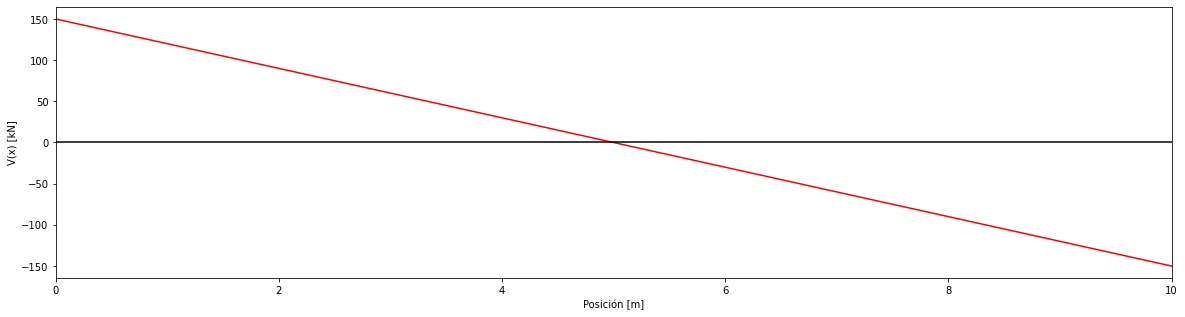

In [16]:
grafico_funcion_viga(xi, V(xi), "V(x) [kN]")

## Gráfica de momento flector $M(x)$

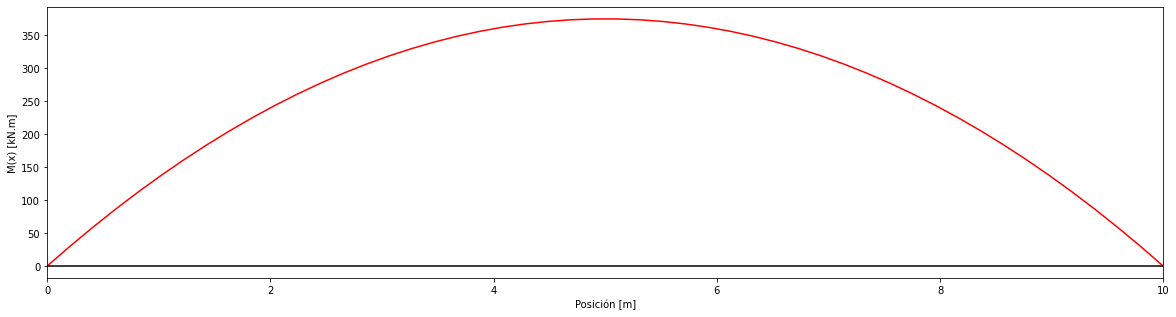

In [17]:
grafico_funcion_viga(xi, M(xi), "M(x) [kN.m]")

## Gráfica de ángulo de giro $\theta(x)$

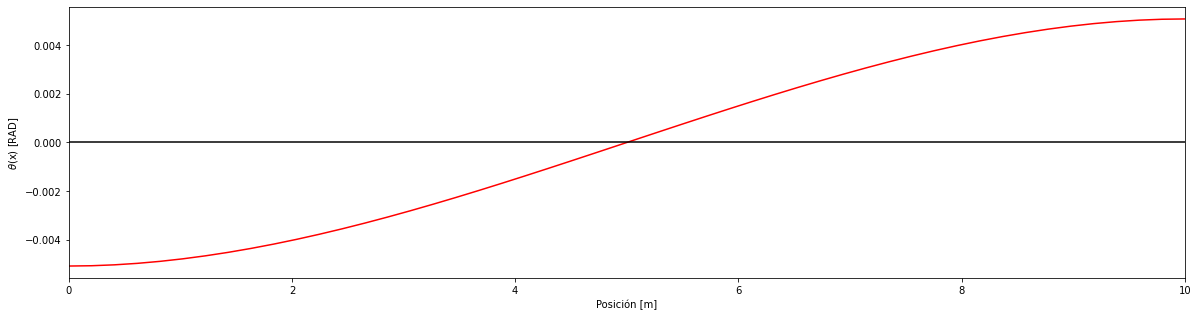

In [18]:
grafico_funcion_viga(xi, t(xi), r"$\theta$(x) [RAD]")

## Gráfica de desplazamientos verticales (deflexiones) $v(x)$

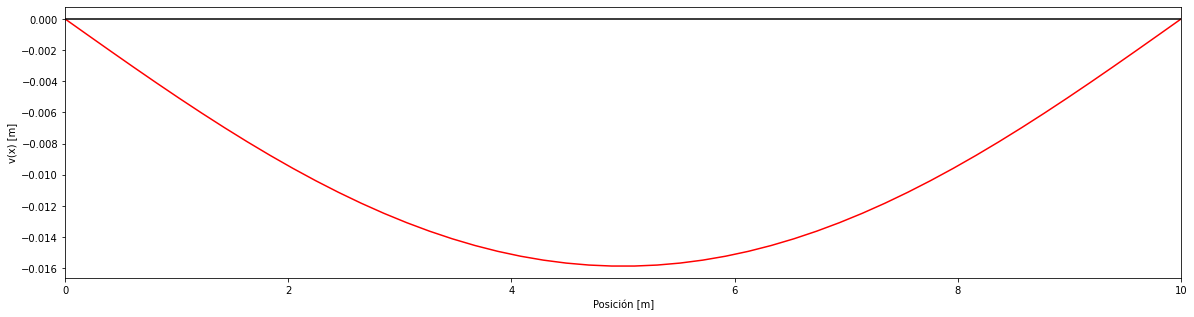

In [19]:
grafico_funcion_viga(xi, v(xi), "v(x) [m]")